In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://raw.githubusercontent.com/Maarij-Moin/titanic-survivor-prediction/refs/heads/main/data/Titanic_data.csv"
data = pd.read_csv(url)

# EDA
print("Dataset Information:")
print(data.info())
print("\nMissing values:")
print(data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


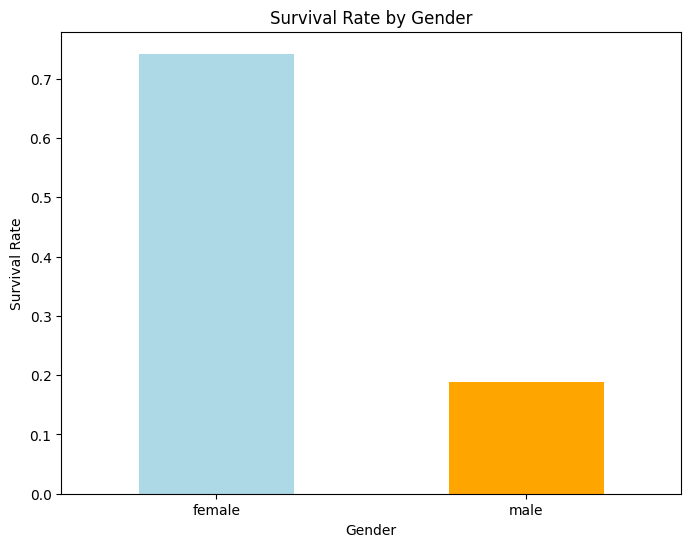

In [3]:
# Survival rate by gender
gender_survival = data.groupby('Sex')['Survived'].mean()
print(gender_survival)
gender_survival.plot(kind='bar', color=['lightblue', 'orange'], figsize=(8, 6))
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

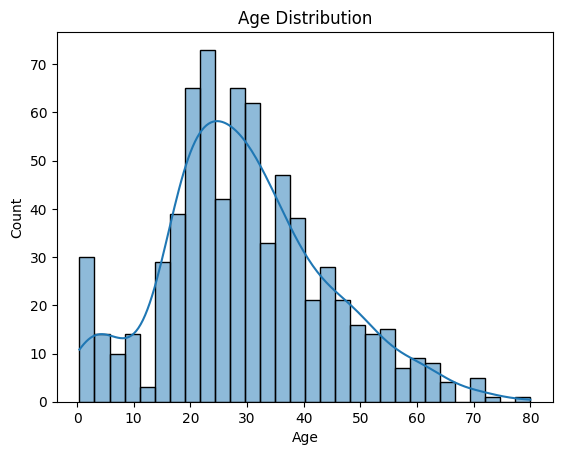

In [4]:
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


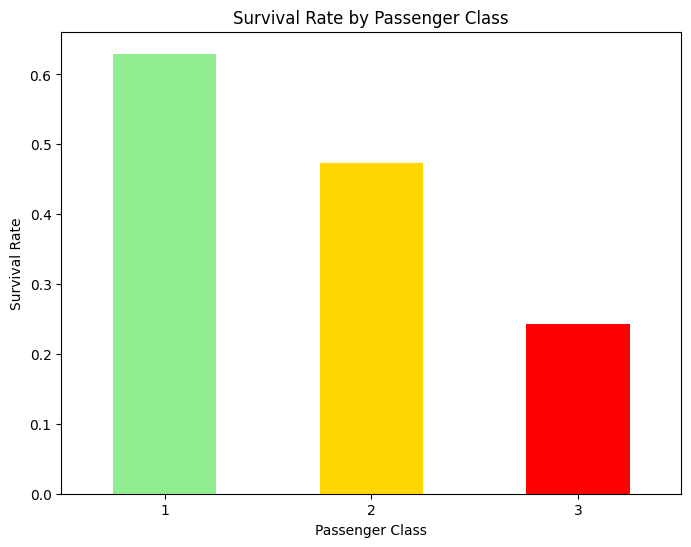

In [5]:
# Survival rate by class
class_survival = data.groupby('Pclass')['Survived'].mean()
print(class_survival)
class_survival.plot(kind='bar', color=['lightgreen', 'gold', 'red'], figsize=(8, 6))
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


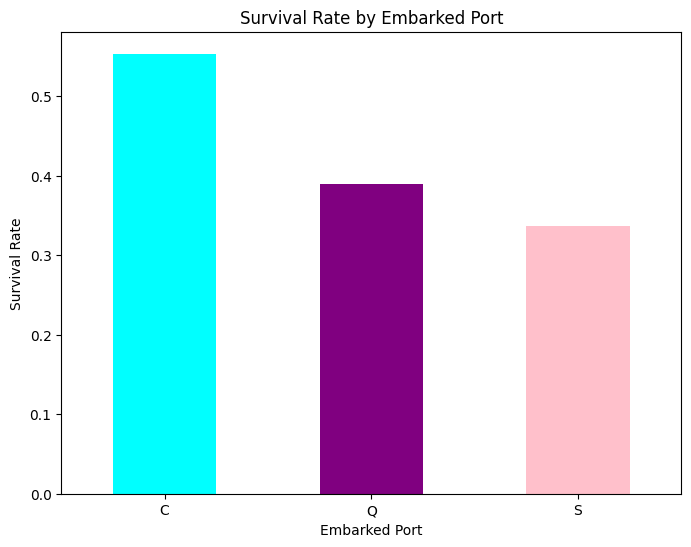

In [6]:
# Survival rate by embarkation port
embarked_survival = data.groupby('Embarked')['Survived'].mean()
print(embarked_survival)
embarked_survival.plot(kind='bar', color=['cyan', 'purple', 'pink'], figsize=(8, 6))
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


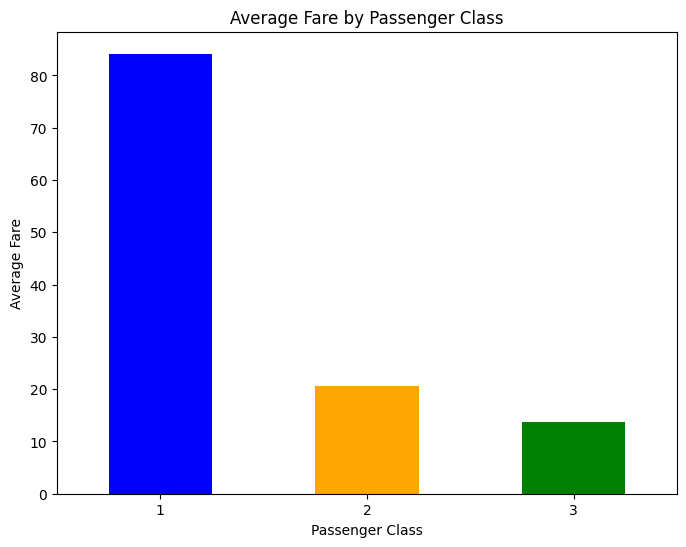

In [7]:
# Average fare by class
class_fare = data.groupby('Pclass')['Fare'].mean()
print(class_fare)
class_fare.plot(kind='bar', color=['blue', 'orange', 'green'], figsize=(8, 6))
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

AgeGroup
Child       0.579710
Teenager    0.428571
Adult       0.365753
Elderly     0.227273
Name: Survived, dtype: float64


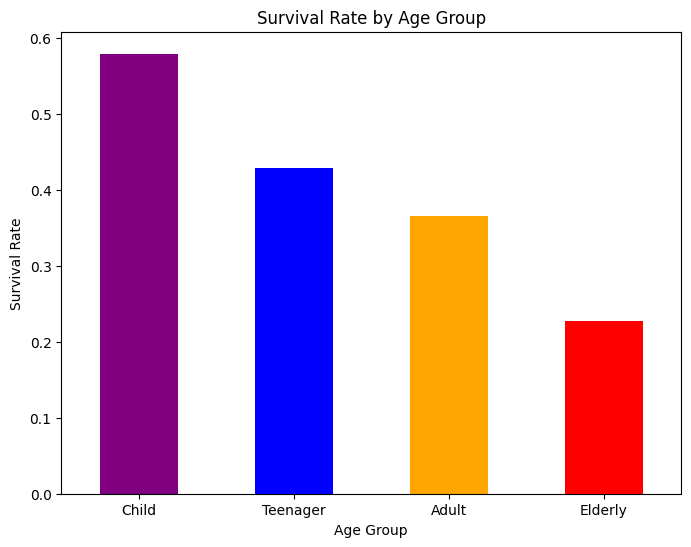

In [13]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Elderly'])
# Survival rate by age group
age_group_survival = data.groupby('AgeGroup', observed=True)['Survived'].mean()
print(age_group_survival)
age_group_survival.plot(kind='bar', color=['purple', 'blue', 'orange', 'red'], figsize=(8, 6))
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


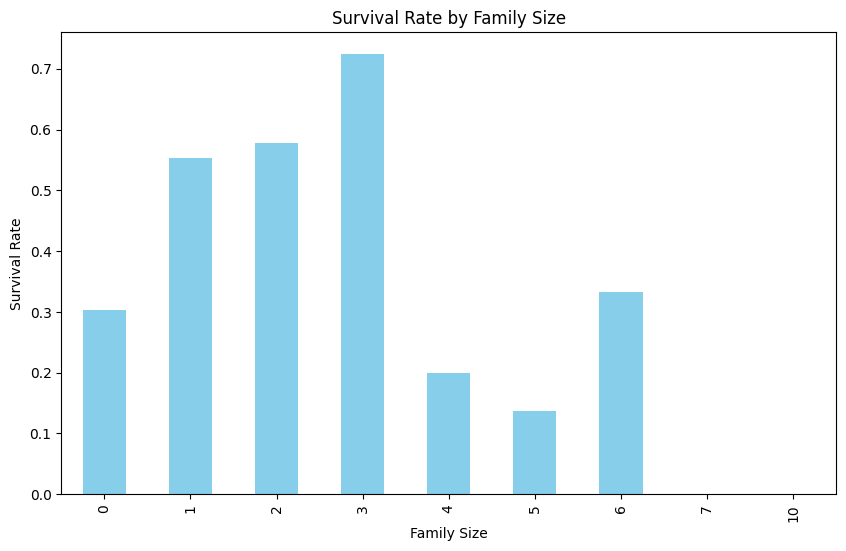

In [9]:
# Survival rate by family size
data['FamilySize'] = data['SibSp'] + data['Parch']
family_survival = data.groupby('FamilySize')['Survived'].mean()
print(family_survival)
family_survival.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


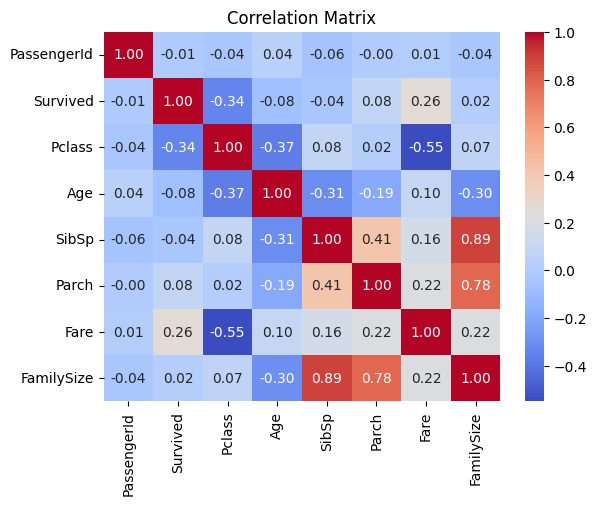

In [10]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
# Preprocessing
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data = data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1) # Dropping less useful columns

In [15]:
# data prepration
numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Embarked','Sex']  

X = data[numeric_columns].copy()
y = data['Survived']

# Handle missing values (e.g., fill missing age with median or mean)
X['Age'] = X['Age'].fillna(X['Age'].median())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Data training
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

best_model = None
best_accuracy = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {acc * 100:.2f}%")
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

print("\nBest Model:", best_model)
print("Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))


Logistic Regression Accuracy: 80.45%
Random Forest Accuracy: 82.12%
Support Vector Machine Accuracy: 81.56%

Best Model: RandomForestClassifier(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

